Importing the required libraries

In [3]:
#---- Wall Breakers----#
# Sunny Kaushik-- IMT2021007---#
# Shrey Salaria-- IMT2021087---#
# Akash Perla-- IMT2021530---#

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [5]:
train_df=pd.read_csv("augmented_train.csv")
test_df=pd.read_csv("test.csv")
train_df["Journey_Time"] = train_df["Journey_Time"].apply(lambda x: max(min(x, 80), 12))

In [6]:
train_df.head()

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day,Target
0,245504,670,769,29.2,RX,PVB,LDG,Saturday,0
1,537723,1906,625,41.0,TK,SKA,PGZ,Saturday,1
2,420755,107,785,53.8,RX,RUG,ODA,Friday,0
3,394706,2209,1180,38.0,AI,GWZ,GIZ,Tuesday,0
4,151270,2314,1065,30.0,AI,DWO,EGO,Wednesday,0


In [7]:
train_df.describe()

,Index,Bus_ID,DepartureTime,Journey_Time,Target
count,434505.000000,434505.000000,434505.000000,364960.000000,434505.000000
mean,269818.494880,2427.388428,802.841113,26.550512,0.445408
std,155723.846616,2066.131768,278.062951,13.704470,0.497011
min,0.000000,1.000000,10.000000,12.000000,0.000000
25%,134943.000000,712.000000,565.000000,16.200000,0.000000
50%,269969.000000,1810.000000,795.000000,23.000000,0.000000
75%,404660.000000,3742.000000,1035.000000,32.400000,1.000000
max,539381.000000,7814.000000,1439.000000,80.000000,1.000000


In [8]:
train_df.drop_duplicates(inplace=True)

In [9]:
train_df.isna().sum()

Index                     0
Bus_ID                    0
DepartureTime             0
Journey_Time          69078
Bus_Operator              0
Departure_Bus_Stop        0
Arrival_Bus_Stop          0
Day                    1266
Target                    0
dtype: int64

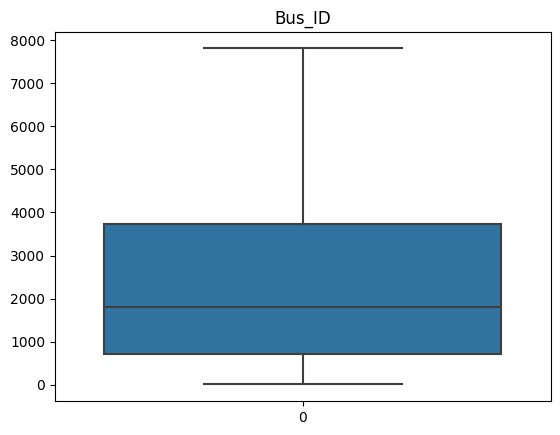

<Figure size 1000x1000 with 0 Axes>

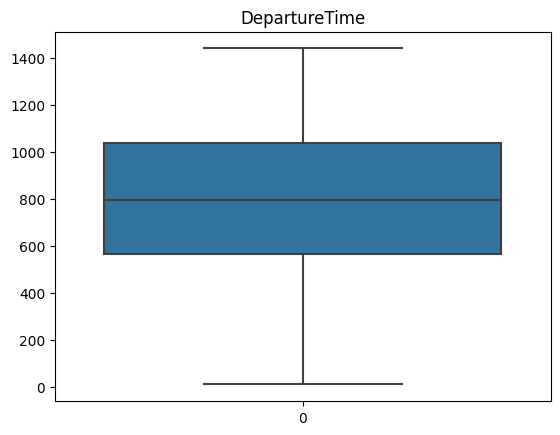

<Figure size 1000x1000 with 0 Axes>

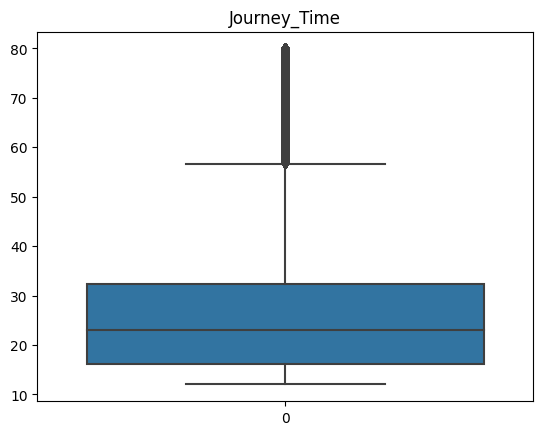

<Figure size 1000x1000 with 0 Axes>

In [10]:
# for label in train_df.columns[1:]:
#   plt.scatter(train_df[label], train_df["Index"])
#   plt.title(label)
#   plt.ylabel("Id")
#   plt.xlabel(label)
#   plt.show()
#train_df=train_df.dropna()
# feature_to_drop_na = 'Day'  # Change this to the name of the feature you want to clean

# train_df = train_df.dropna(subset=['Day'])

features=["Bus_ID","DepartureTime","Journey_Time"]
for i in range(len(features)):
  sns.boxplot(train_df[features[i]])
  plt.title(features[i])
  plt.figure(figsize=(10, 10))
  plt.show()

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# train_df.fillna(train_df.mode().iloc[0], inplace=True)
# test_df.fillna(test_df.mode().iloc[0], inplace=True)
# train_df.fillna(-999, inplace=True)
# test_df.fillna(-999, inplace=True)
# train_df['categorical_column'].fillna(train_df['categorical_column'].mode().iloc[0], inplace=True)
# test_df['categorical_column'].fillna(test_df['categorical_column'].mode().iloc[0], inplace=True)
# train_df.interpolate(method='linear', inplace=True)
# test_df.interpolate(method='linear', inplace=True)
# categorical_columns = ['Bus_Operator', 'Departure_Bus_Stop','Arrival_Bus_Stop']  # Replace with actual column names
# # Replace missing values in categorical columns based on probabilities
# for col in categorical_columns:
#     prob = train_df[col].value_counts() / len(train_df[col])
#     train_df[col].fillna(pd.Series(np.random.choice(prob.index, p=prob.values, size=len(train_df))), inplace=True)
#     test_df[col].fillna(pd.Series(np.random.choice(prob.index, p=prob.values, size=len(test_df))), inplace=True)




<ipython-input-14-6beb9dc58d95>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)


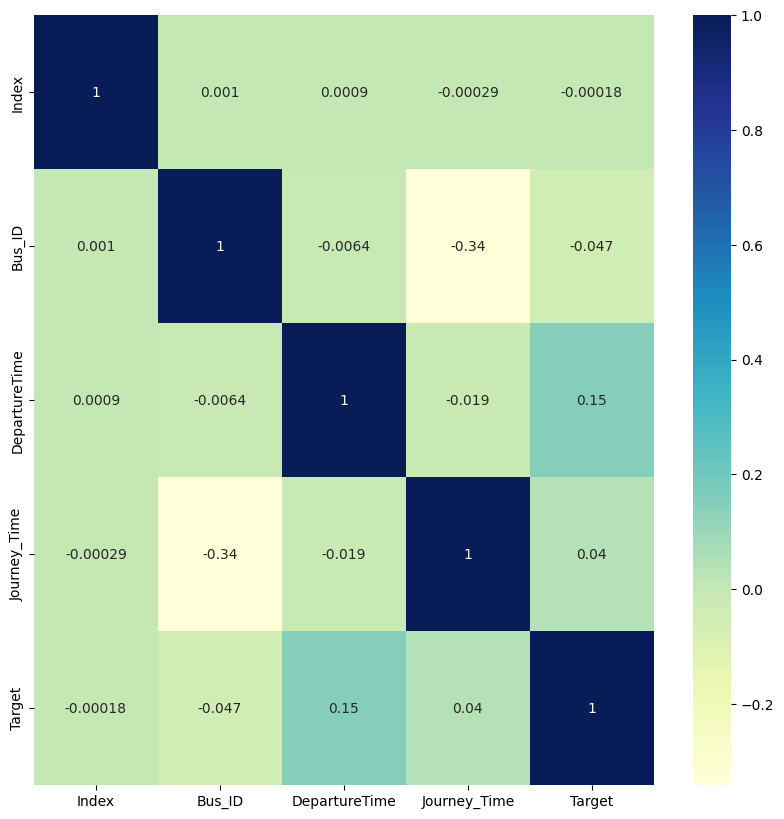

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)
plt.savefig("corellation.png")

In [13]:
X=train_df.iloc[:,1:8]
Y=train_df.iloc[:,-1]
#X = X.drop('Day', axis=1)
#X = X.drop('Journey_Time', axis=1)
#X = X.drop('Bus_ID', axis=1)
# X = X.drop('Bus_Operator', axis=1)



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.99, random_state=32)

In [ ]:
X_test_df=test_df.iloc[:,1:8]
#X_test_df = X_test_df.drop('Day', axis=1)
#X_test_df = X_test_df.drop('Bus_ID', axis=1)
# X_test_df = X_test_df.drop('Bus_Operator', axis=1)
#X_test_df = X_test_df.drop('Journey_Time', axis=1)
# scaler = StandardScaler()
# X_test_df = scaler.fit_transform(X_test_df)

In [ ]:
!pip install category-encoders

import category_encoders as ce
encoder = ce.TargetEncoder(cols=['Bus_ID','Bus_Operator', 'Departure_Bus_Stop', 'Arrival_Bus_Stop','Day'])
X_train = encoder.fit_transform(X_train, Y_train)
X_test = encoder.transform(X_test)
X_test_df=encoder.transform(X_test_df)

In [ ]:
# # Create an IterativeImputer instance
imputer = IterativeImputer(max_iter=10000, random_state=32)

# Fit the imputer on the dataset and transform the data
X_train = imputer.fit_transform(X_train)
X_test_df = imputer.fit_transform(X_test_df)


In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(
    n_estimators=280,
    max_depth=9,
    learning_rate=0.1,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0.01,
    reg_lambda=1,
    objective='binary:logistic',
)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(accuracy_score(Y_test,y_pred))
print(f1_score(Y_test,y_pred))


0.6646692786356303
0.5934618608549875


In [ ]:
label=test_df.iloc[:,0]
y_pred_test = model.predict(X_test_df)
y_pred_test = y_pred_test.reshape(len(y_pred_test),1)
y_pred_test=np.array(y_pred_test)
label = label.values.reshape(-1,1)
label=np.array(label)
result=np.concatenate((label,y_pred_test),axis=1)
result_df=pd.DataFrame(result,columns=['Index','Target'])
result_df.to_csv('rf27.csv',index=False)